In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Duomenų įkėlimas
ekg_data = pd.read_csv("full_dataset_NO_missing_values.csv")



In [2]:
# 2. Atskiriame požymius ir klases
X = ekg_data.iloc[:, :-1]
y = ekg_data.iloc[:, -1]



In [3]:
# 3. Paliekam tik skaitinius stulpelius (float arba int)
X = X.select_dtypes(include=[np.number])



In [4]:
# 4. Pašalinam eilutes su trūkstamomis reikšmėmis
mask = X.notna().all(axis=1)
X = X[mask]
y = y[mask]

print(f"Naudojami {X.shape[1]} požymiai ir {X.shape[0]} stebėjimai po išvalymo.")



Naudojami 31 požymiai ir 11818 stebėjimai po išvalymo.


In [5]:
# 5. t-SNE parametrų nustatymas
tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    learning_rate=200,
    init='pca',
    early_exaggeration=12,
    random_state=1000
)



In [6]:
# 6. t-SNE taikymas
X_embedded = tsne.fit_transform(X)



/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [7]:
# 7. Rezultatų DataFrame
tsne_df = pd.DataFrame(X_embedded, columns=["dim_1", "dim_2"])
tsne_df["Label"] = y.values



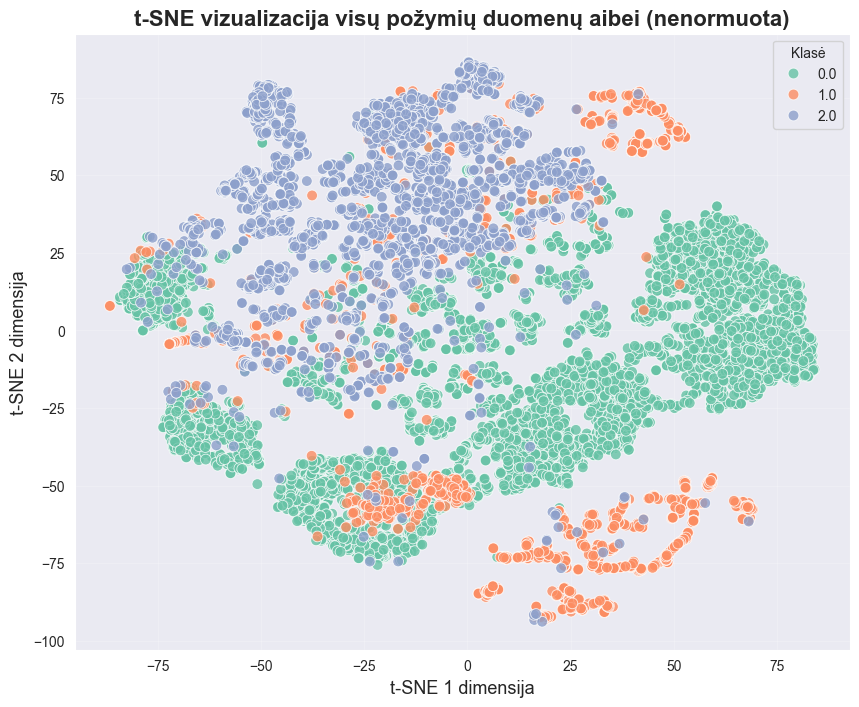

In [8]:
# 8. Braižymas
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df,
    x="dim_1", y="dim_2",
    hue="Label",
    palette="Set2",
    s=60,
    alpha=0.8
)
plt.title("t-SNE vizualizacija visų požymių duomenų aibei (nenormuota)", fontsize=16, weight='bold')
plt.xlabel("t-SNE 1 dimensija", fontsize=13)
plt.ylabel("t-SNE 2 dimensija", fontsize=13)
plt.legend(title="Klasė", fontsize=10)
plt.grid(True, alpha=0.2)
plt.show()
